In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import nibabel as nib
import random


import dask.dataframe as dd

sys.path.append("../")
from src.utils import *
from src.LSN_roi import *
from src.simul import *

import matplotlib.pyplot as plt

In [10]:
summary_results_dir = "/home/nikhil/projects/brain_changes/brain-diff/results/summary/"
results_configs = {
                    "SFCN": "SFCN_model_single_visit_train_two_visit_subset_test_two_visit_subset.csv",
                    "Baseline_single_visit_large": "baseline_model_single_visit_train_full_ses2_test_two_visit_subset.csv",
                    "Baseline_single_visit_small": "baseline_model_single_visit_train_two_visit_subset_test_two_visit_subset.csv",
                    "Baseline_two_visits": "baseline_model_two_visits_train_two_visit_subset_test_two_visit_subset.csv",
                    "LSN": "LSN_model_single_visit_train_two_visit_subset_test_two_visit_subset.csv"
                }

In [11]:
perf_df = pd.DataFrame()
for config, f in results_configs.items():
    df = pd.read_csv(f"{summary_results_dir}{f}")
    df["config"] = config
    perf_df = perf_df.append(df)

perf_df["Benjamin_Button"] = perf_df["brainage_at_ses3"] < perf_df["brainage_at_ses2"]


chronoage_delta  err_type      model          
1.0              baseline_err  GradBoost_large     4.828480
                               GradBoost_small     9.228598
                               LSN                 6.016811
                               RF                  4.850000
                               Ridge               6.872789
                                                    ...    
7.0              followup_err  GradBoost_small    10.490274
                               LSN                 4.675855
                               RF                  4.490000
                               Ridge               2.844445
                               SFCN                3.558448
Name: abs_error, Length: 126, dtype: float64


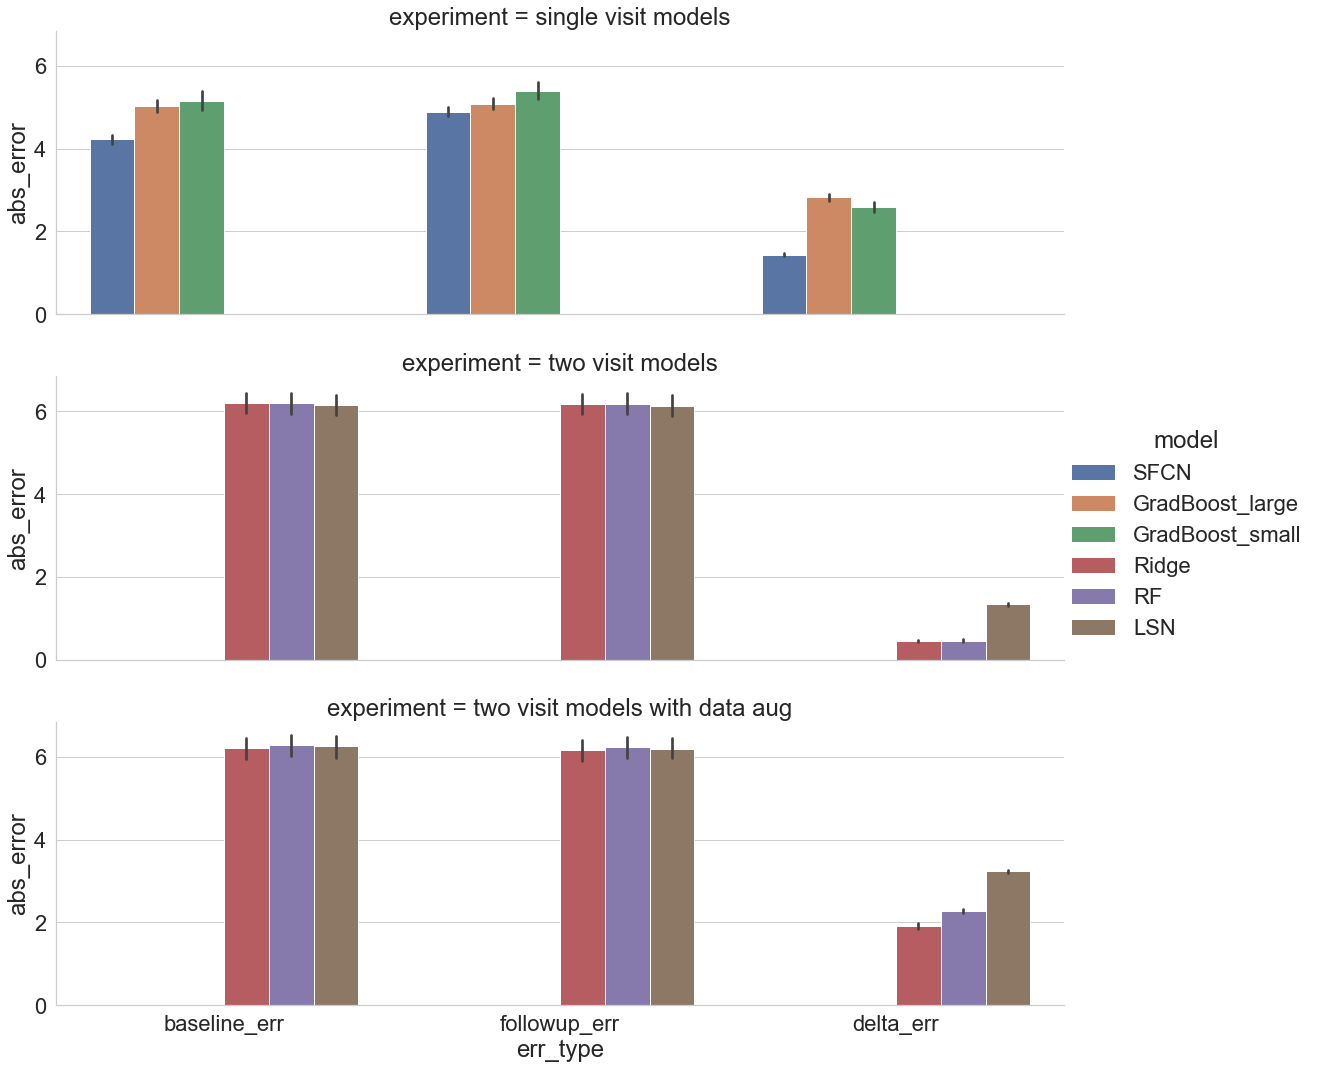

In [12]:
plot_df = perf_df.copy()
plot_df["abs_error"] = np.abs(plot_df["error"]) 
plot_df.loc[plot_df["config"].isin(["SFCN","Baseline_single_visit_large","Baseline_single_visit_small"]), "experiment"] = "single visit models"
plot_df.loc[plot_df["config"].isin(["LSN", "Baseline_two_visits"]), "experiment"] = "two visit models"
plot_df.loc[(plot_df["config"].isin(["LSN", "Baseline_two_visits"])) & (plot_df["data_aug"]), "experiment"] = "two visit models with data aug"

print(plot_df.groupby(["chronoage_delta","err_type","model"]).mean()["abs_error"])

sns.set(font_scale=2)
with sns.axes_style("whitegrid"):
    g = sns.catplot(x="err_type",y="abs_error", hue="model", col="experiment", col_wrap=1, kind="bar", data=plot_df,aspect=3)

In [13]:
plot_df.groupby(["experiment","model"]).sum()["Benjamin_Button"]


experiment                      model          
single visit models             GradBoost_large    3984
                                GradBoost_small    1329
                                SFCN               1089
two visit models                LSN                   0
                                RF                    0
                                Ridge                 0
two visit models with data aug  LSN                2874
                                RF                 1314
                                Ridge               927
Name: Benjamin_Button, dtype: int64